In [1]:
import pandas as pd
import numpy as np
import math
import tensorflow as tf 


In [2]:
df = pd.read_csv("/content/house_train.csv")
df_test = pd.read_csv("/content/house_test.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


#EDA

In [5]:
(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


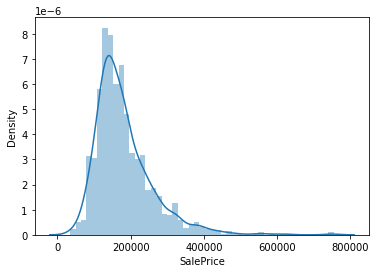

In [6]:
import seaborn as sns 
sns.distplot(df['SalePrice'])

We have a skewness, let's fix it.

In [7]:
df['SalePrice'] = np.log1p(df['SalePrice'])

Let's check out the graph again.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


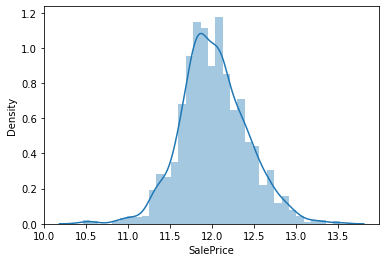

In [8]:
sns.distplot(df['SalePrice'])

Looks great! 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Let's find out which features have more then 50% correlation with the target feature (SalePrice).

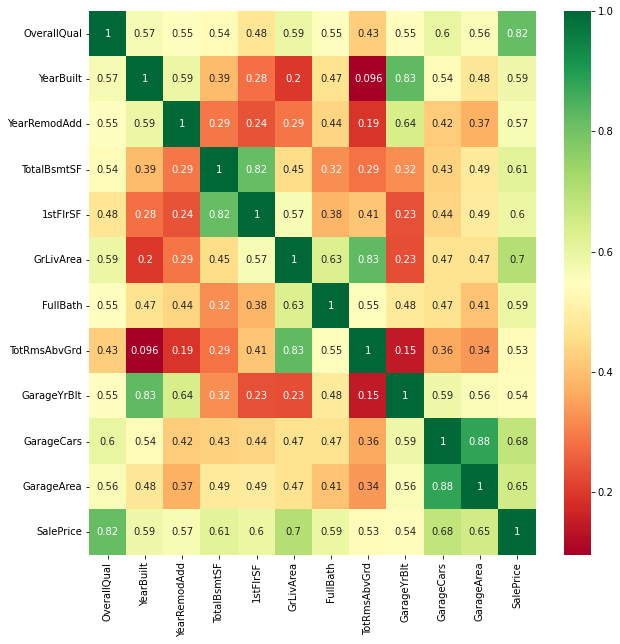

In [10]:
import matplotlib.pyplot as plt
corr = df.corr()
highest_corr_features = corr.index[abs(corr['SalePrice'])>0.5]
plt.figure(figsize = (10,10))
g = sns.heatmap(df[highest_corr_features].corr(),annot=True, cmap = 'RdYlGn')

Let's look at the one by one connections between coreelated features and SalePrice column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92e92dbf10>,
      dtype=object)

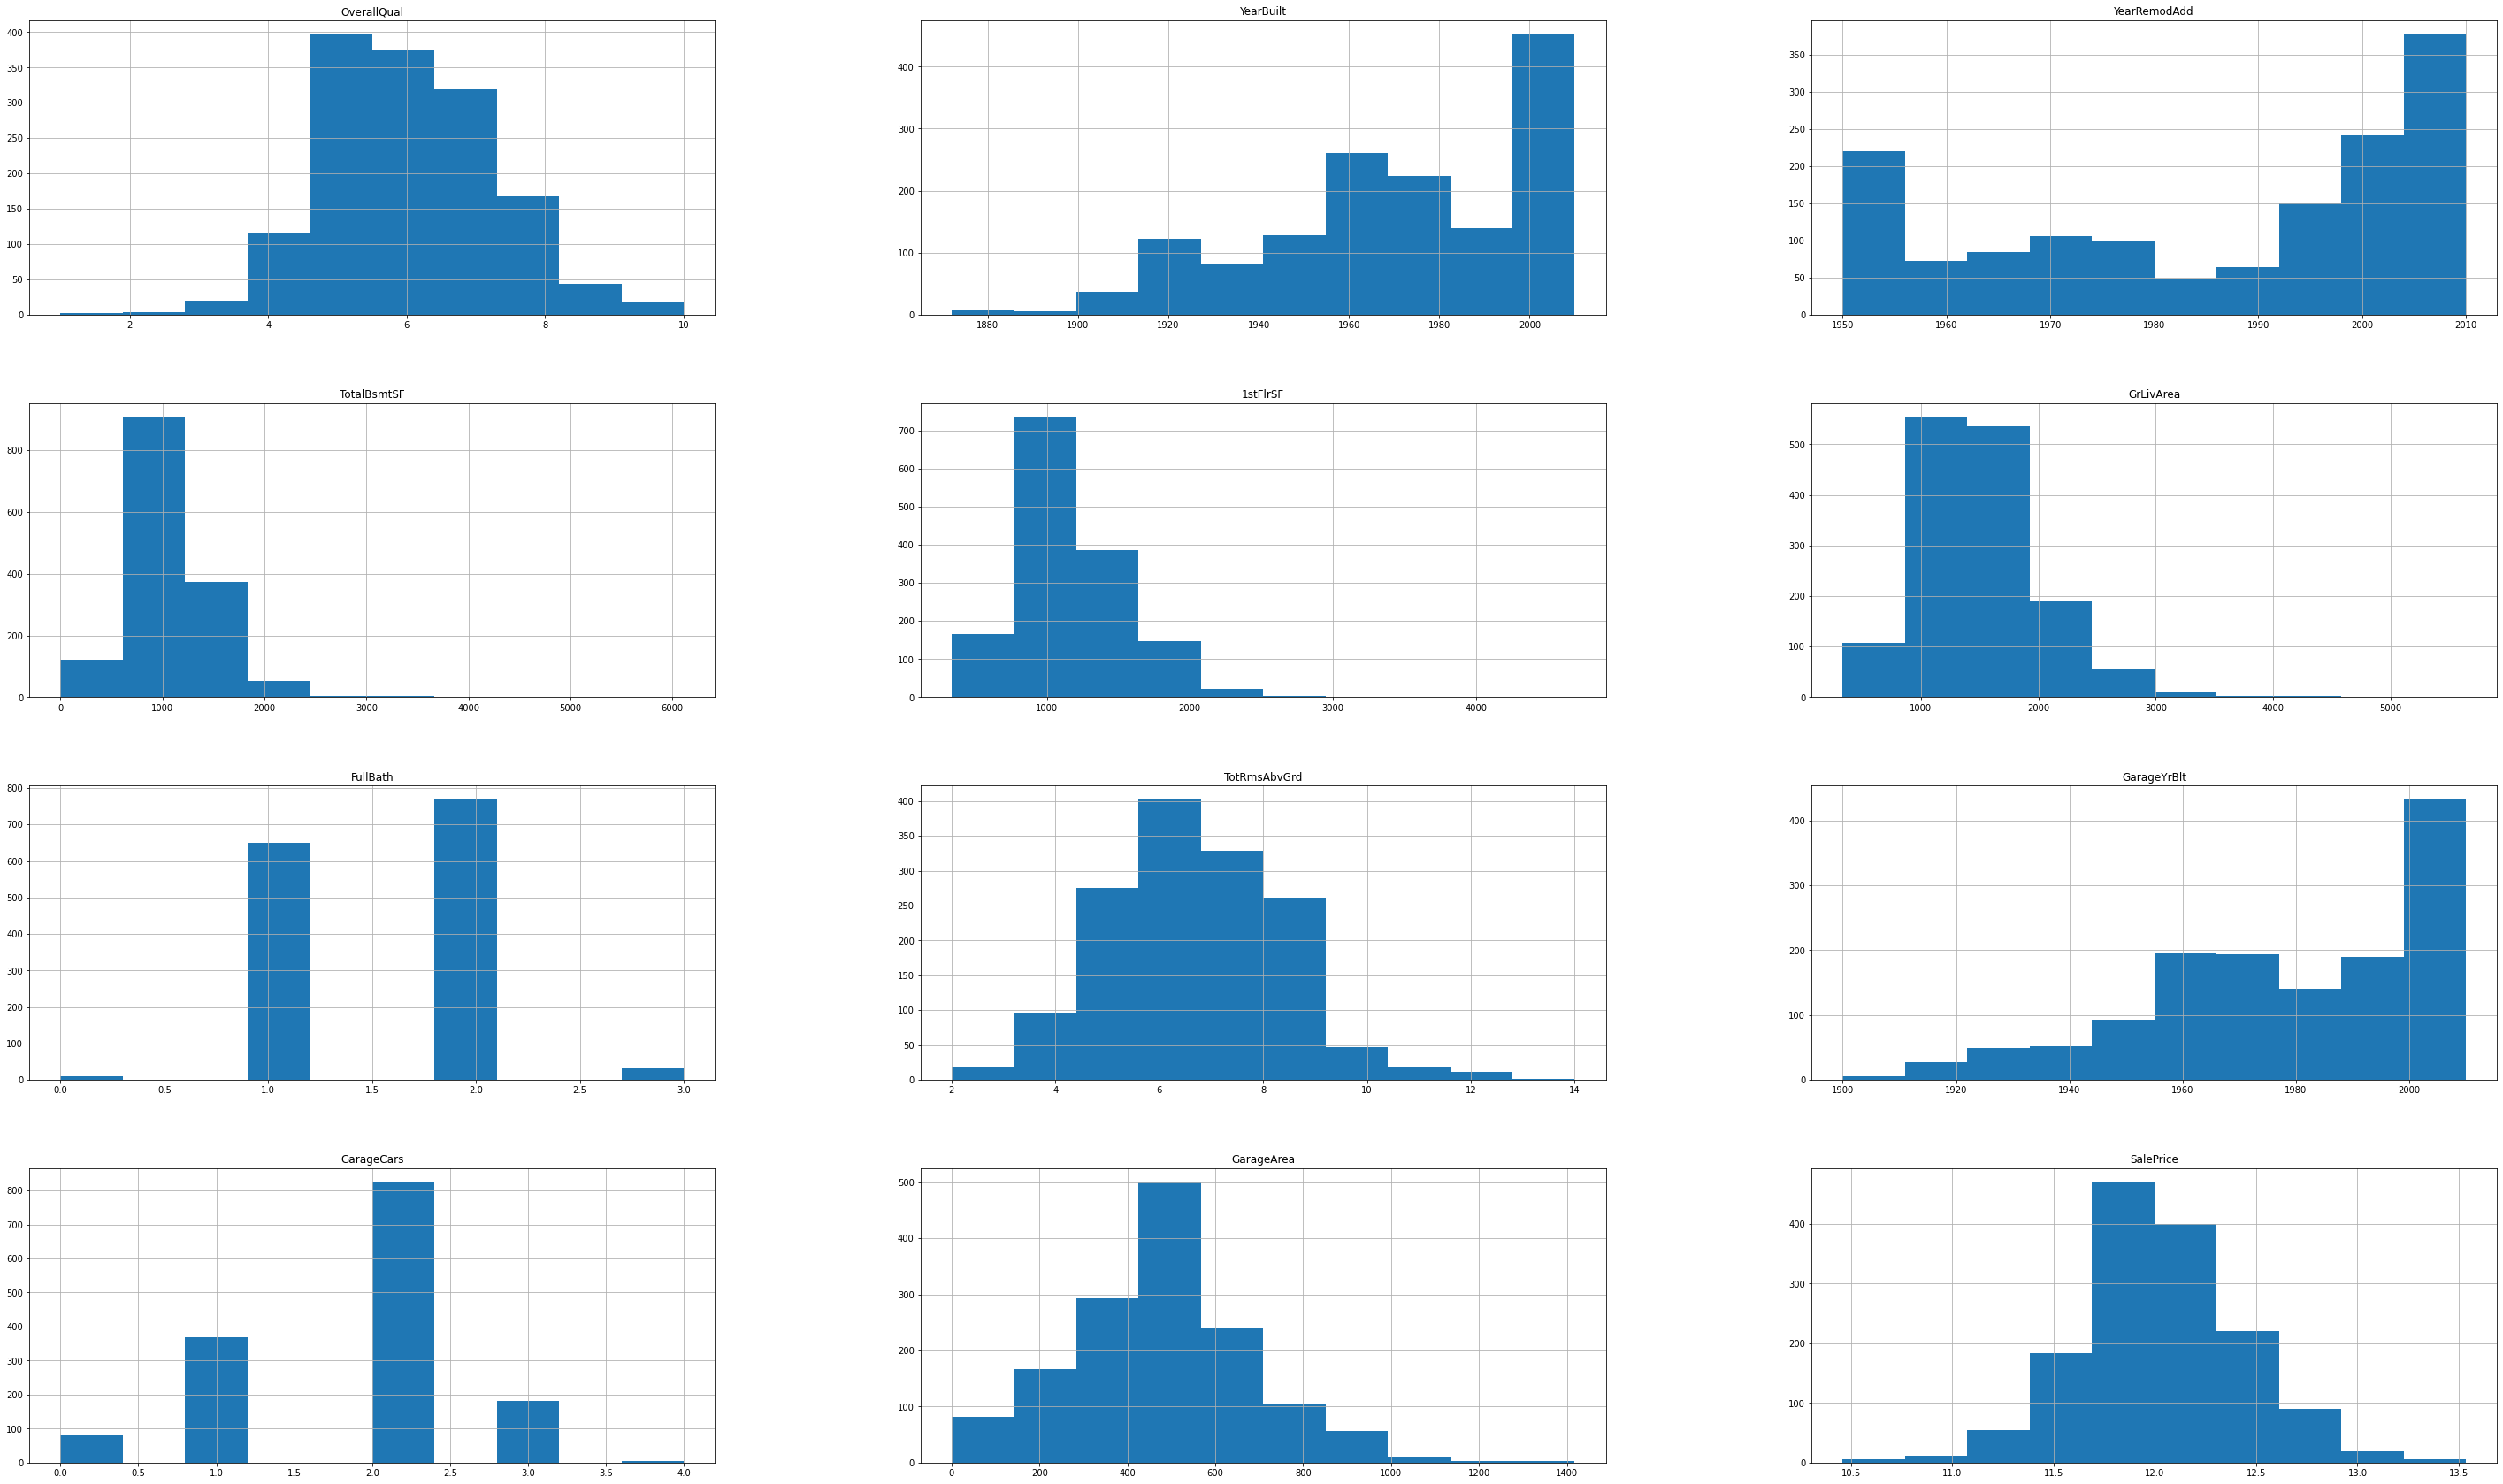

In [11]:
df.hist(column=highest_corr_features, figsize=(50, 30))


Text(0, 0.5, 'Price of the House')

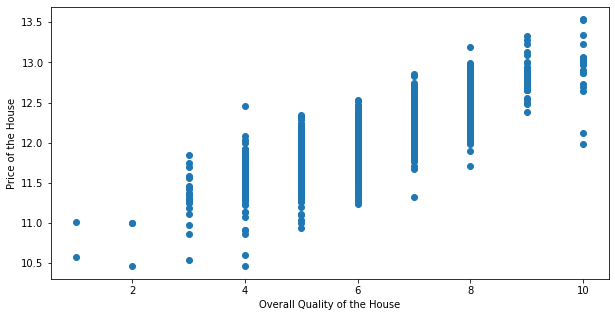

In [12]:
fig,ax = plt.subplots(figsize = (10,5))
ax.scatter(df['OverallQual'],df['SalePrice'])
ax.set_xlabel('Overall Quality of the House')
ax.set_ylabel('Price of the House')

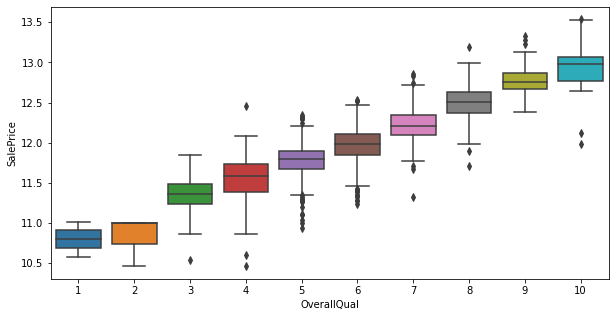

In [13]:
plt.figure(figsize = (10,5))
sns.boxplot(data= df, y='SalePrice',x = 'OverallQual')

Hmm, that's not a suprise. Overall quality and Sale Price have a positive correlation. 

Text(0, 0.5, 'Price of the House')

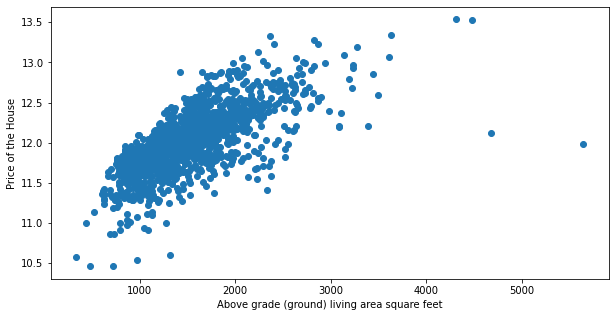

In [14]:
fig,ax = plt.subplots(figsize = (10,5))
ax.scatter(df['GrLivArea'],df['SalePrice'])
ax.set_xlabel('Above grade (ground) living area square feet')
ax.set_ylabel('Price of the House')

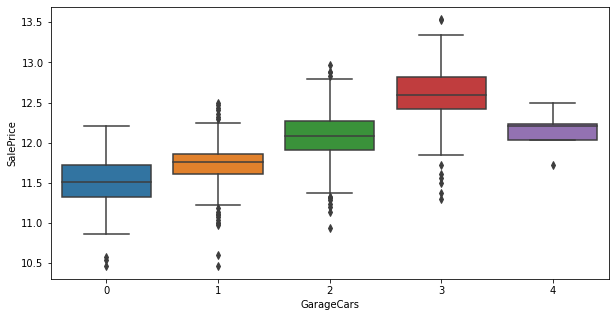

In [15]:
plt.figure(figsize = (10,5))
sns.boxplot(data= df, y='SalePrice',x = 'GarageCars')

Text(0, 0.5, 'Price of the House')

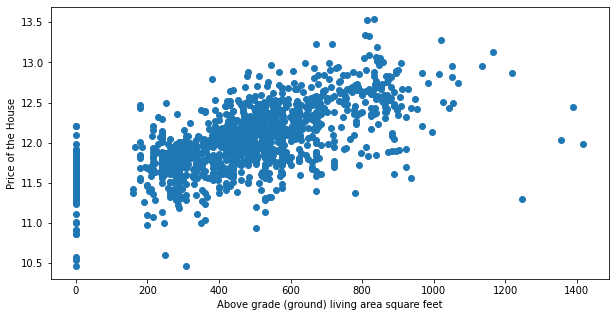

In [16]:
fig,ax = plt.subplots(figsize = (10,5))
ax.scatter(df['GarageArea'],df['SalePrice'])
ax.set_xlabel('Above grade (ground) living area square feet')
ax.set_ylabel('Price of the House')

Let's combine train and test datasets before the cleaning. 

In [17]:
target = df['SalePrice']
test_id = df_test['Id']
df_all = pd.concat([df,df_test])
df_all = df_all.drop(['Id', 'SalePrice'], axis = 1)

Let's start cleaning!

In [18]:
missing_features = []
obj = df_all.isnull().sum()
for key,value in obj.iteritems():
    if value > 0:
      print(key,",",value)
      missing_features.append(key)

MSZoning , 4
LotFrontage , 486
Alley , 2721
Utilities , 2
Exterior1st , 1
Exterior2nd , 1
MasVnrType , 24
MasVnrArea , 23
BsmtQual , 81
BsmtCond , 82
BsmtExposure , 82
BsmtFinType1 , 79
BsmtFinSF1 , 1
BsmtFinType2 , 80
BsmtFinSF2 , 1
BsmtUnfSF , 1
TotalBsmtSF , 1
Electrical , 1
BsmtFullBath , 2
BsmtHalfBath , 2
KitchenQual , 1
Functional , 2
FireplaceQu , 1420
GarageType , 157
GarageYrBlt , 159
GarageFinish , 159
GarageCars , 1
GarageArea , 1
GarageQual , 159
GarageCond , 159
PoolQC , 2909
Fence , 2348
MiscFeature , 2814
SaleType , 1


In [19]:
missing_features

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [20]:
set_missing_features = set(missing_features)
difference = [feature for feature in highest_corr_features if feature not in set_missing_features]
difference

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'SalePrice']

In [21]:
total = df_all.isnull().sum().sort_values(ascending = False)
percent = (df_all.isnull().sum() /df_all.isnull().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1, keys = ['Total','Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071


Deleting the features that have more than 5 missing values. 

In [22]:
df_all.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)

In [23]:
new_missing_features = []
total = df_all.isnull().sum().sort_values(ascending = False)
for key,value in total.iteritems():
  if value > 0:
    new_missing_features.append(key)
new_missing_features

['MSZoning',
 'Functional',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Utilities',
 'BsmtFinSF2',
 'Exterior2nd',
 'GarageCars',
 'GarageArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'Exterior1st',
 'TotalBsmtSF',
 'Electrical',
 'SaleType',
 'KitchenQual']

There are categorical and numeric data in this *new_missing_features* list, we need to identify and fill the data by their types. 

Filling the numeric data

In [24]:
numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']

for feature in numeric_missed:
    df_all[feature] = df_all[feature].fillna(0)

Filling the categorical data


In [25]:
categorical_missed = ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual']

for feature in categorical_missed:
    df_all[feature] = df_all[feature].fillna(df_all[feature].mode()[0])

In [26]:
#Fill in the remaining missing values with the values that are most common for this feature.

df_all['Functional'] = df_all['Functional'].fillna('Typ')

In [27]:
df_all.drop(['Utilities'], axis=1, inplace=True)

Now, let's check again to see if we have any missing values.

In [28]:
df_all.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

Lovely stuff, now we don't have any missing values.

In [29]:
df_all.duplicated().sum()

3

In [30]:
df_all.drop_duplicates()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,32,0,0,0,0,700,7,2006,WD,Normal


In [31]:
from scipy.stats import norm, skew
numeric_feats = df_all.dtypes[df_all.dtypes != 'object'].index
skewed_feats = df_all[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
YearBuilt        -0.599806
dtype: float64

In [32]:
for i in high_skew.index:
  df_all[i] = np.log1p(df_all[i])

In [33]:
df_all['TotalSF'] = df_all['TotalBsmtSF'] + df_all['1stFlrSF'] + df_all['2ndFlrSF']

Categorical to numerical by using one hot encoding 

In [34]:
df_all = pd.get_dummies(df_all)
df_all.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,7,1.791759,7.602900,2003,6.561031,0.0,5.017280,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,9.169623,6,2.197225,7.589336,1976,6.886532,0.0,5.652489,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,9.328212,7,1.791759,7.601902,2002,6.188264,0.0,6.075346,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,9.164401,7,1.791759,7.557995,1970,5.379897,0.0,6.293419,6.629363,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,9.565284,8,1.791759,7.601402,2000,6.486161,0.0,6.196444,7.044033,...,0,0,0,1,0,0,0,0,1,0


Applying Normalization with the help of Skit-learn library

In [35]:
from sklearn import preprocessing

x = df_all.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_all = pd.DataFrame(x_scaled)

In [36]:
x_train =df_all[:len(target)]
x_test = df_all[len(target):]

It's time to apply models 

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_train, target, test_size=0.2, random_state=123)

XGBoost Regression Model

In [38]:
from sklearn.metrics import mean_squared_error as MSE
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
preds[preds<0] = 0
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE: %f" % (rmse))

[20:14:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.110075


Gradient Boost Regression Model

In [39]:
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL

0.00876205636620311

Random Forest Regression Model

In [40]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL

0.01017098304508759

Predicting the house prices

In [42]:
pred_test_data= np.floor(np.expm1(GB.predict(x_test)))
pred_test_data[pred_test_data<0] = 0
submit_RF = pd.DataFrame({
    'Id' :test_id,
    'SalePrice' : pred_test_data
})

In [43]:
submit_RF

,Id,SalePrice
0,1461,124430.0
1,1462,156238.0
2,1463,181934.0
3,1464,181421.0
4,1465,190510.0
...,...,...
1454,2915,80607.0
1455,2916,84810.0
1456,2917,157942.0
1457,2918,120811.0


In [44]:
submit_RF.to_csv('house_prices_submission.csv',index=False)